# BrightPath Academy: Improving Student Outcomes with Data-Driven Insights

## 1. Problem Statement


## 2. Hypothesis Generation

## 3. Getting the System Ready and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



In [6]:
df = pd.read_csv('../artifacts/Student_performance_data.csv')

In [7]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [8]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


## 4. Understanding the Data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


## 5. Exploratory Data Analysis (EDA)

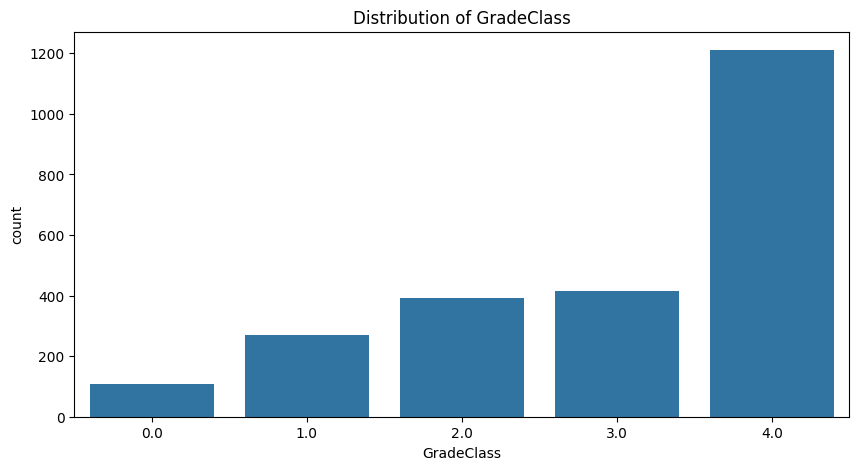

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='GradeClass', data=df)
plt.title('Distribution of GradeClass')
plt.show()

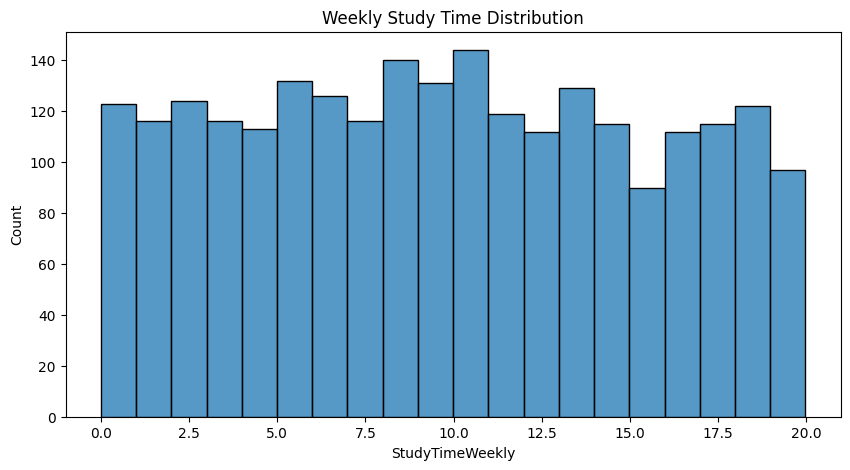

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['StudyTimeWeekly'], bins=20)
plt.title('Weekly Study Time Distribution')
plt.show()

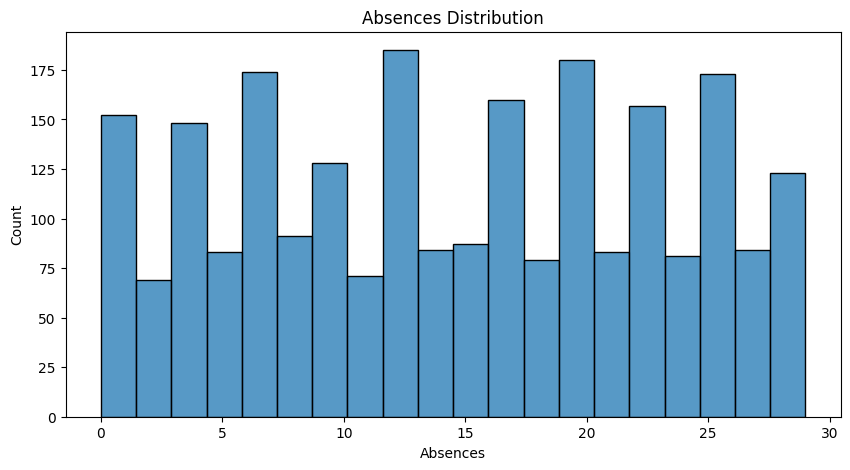

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Absences'], bins=20)
plt.title('Absences Distribution')
plt.show()


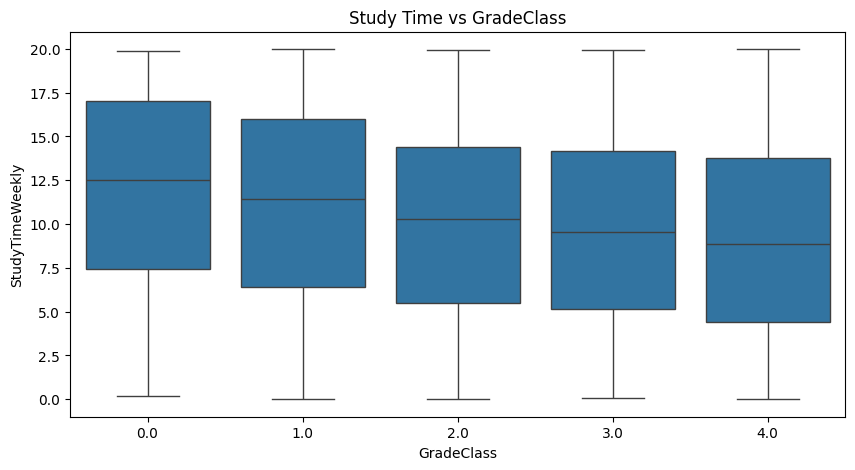

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title('Study Time vs GradeClass')
plt.show()

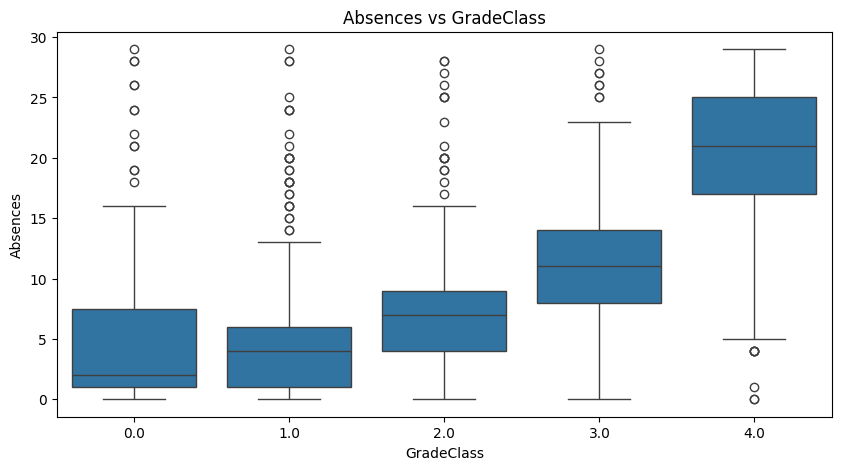

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='GradeClass', y='Absences', data=df)
plt.title('Absences vs GradeClass')
plt.show()

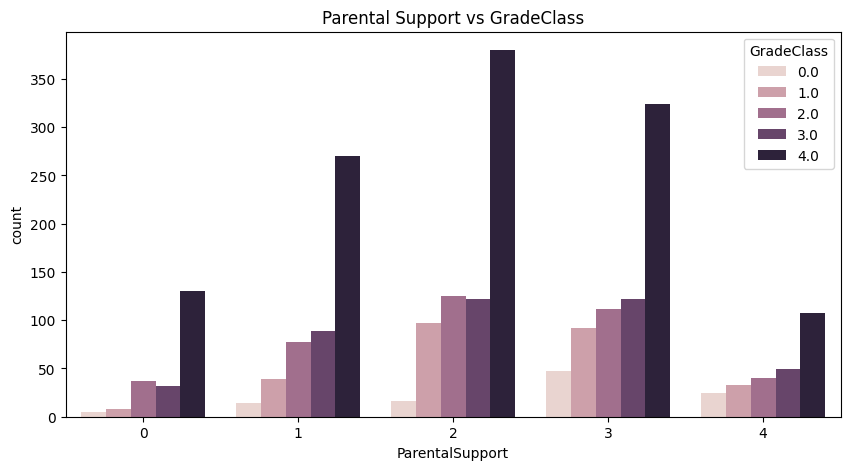

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='ParentalSupport', hue='GradeClass', data=df)
plt.title('Parental Support vs GradeClass')
plt.show()

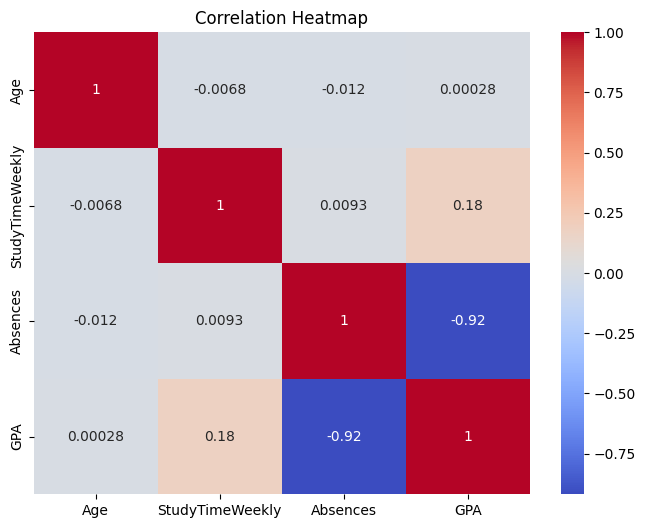

In [16]:
numeric_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 6. Missing Value and Outlier Treatment

In [17]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## 7. Evaluation Metrics

## 8. Feature Engineering

In [19]:
df['TotalExtracurricular'] = df[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)

X = df.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Model Building: Part 1 (Baseline Machine Learning)

Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.38      0.39      0.38        49
         2.0       0.53      0.58      0.55        85
         3.0       0.54      0.36      0.43        86
         4.0       0.84      0.96      0.90       237

    accuracy                           0.68       479
   macro avg       0.46      0.46      0.45       479
weighted avg       0.65      0.68      0.66       479

Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      0.14      0.24        22
         1.0       0.47      0.55      0.51        49
         2.0       0.48      0.49      0.49        85
         3.0       0.48      0.38      0.43        86
         4.0       0.85      0.94      0.89       237

    accuracy                           0.68       479
   macro avg       0.66      0.50      0.51       479
weighted avg       0.69      0.68      

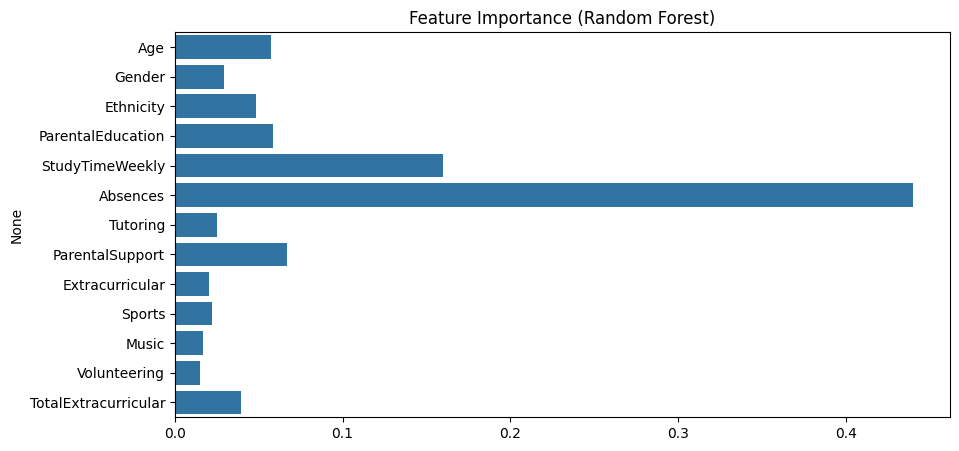

C:\Users\joshu\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [18:35:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

         0.0       0.50      0.23      0.31        22
         1.0       0.44      0.47      0.46        49
         2.0       0.50      0.46      0.48        85
         3.0       0.54      0.51      0.53        86
         4.0       0.86      0.93      0.89       237

    accuracy                           0.69       479
   macro avg       0.57      0.52      0.53       479
weighted avg       0.68      0.69      0.68       479



In [20]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Logistic Regression:\n', classification_report(y_test, lr_pred))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Random Forest:\n', classification_report(y_test, rf_pred))

importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance (Random Forest)')
plt.show()

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print('XGBoost:\n', classification_report(y_test, xgb_pred))

## 10. Model Building: Part 2 (Deep Learning)

C:\Users\joshu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Deep Learning:
               precision    recall  f1-score   support

         0.0       0.67      0.18      0.29        22
         1.0       0.53      0.57      0.55        49
         2.0       0.61      0.60      0.60        85
         3.0       0.57      0.45      0.50        86
         4.0       0.84      0.95      0.89       237

    accuracy                           0.72       479
   macro avg       0.64      0.55      0.57       479
weighted avg       0.71      0.72      0.71       479



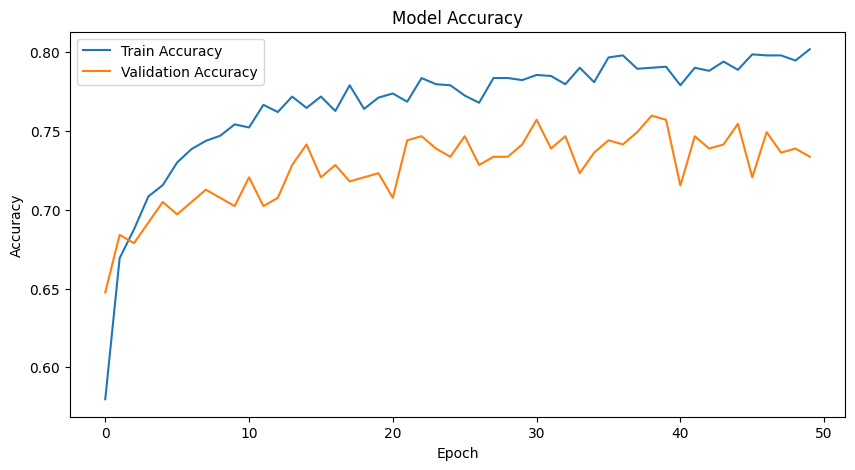

In [21]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

dl_pred = model.predict(X_test)
dl_pred_classes = np.argmax(dl_pred, axis=1)
print('Deep Learning:\n', classification_report(y_test, dl_pred_classes))

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()